# Deep Learning Basic Knowledge

## 预备知识_Preliminaries
### 数据操作
*本节总结：深度学习存储和操作数据的主要接口是张量，其功能包括基本数学运算、广播、索引、切片、内存节省和转换其他Python对象。*
#### 创建
张量是由数值组成的数组，具有一个轴的张量对应数学上的*向量*，具有两个轴的张量对应数学上的*矩阵*。

In [77]:
import torch
x = torch.arange(12)  # arange创建向量，默认为整数
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [78]:
x.shape # 形状
x.numel() # 元素总数

12

In [79]:
X = x.reshape(3, 4) # 改变形状
X

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [80]:
torch.zeros((2, 3, 4)) # 创建一个形状为（2,3,4）的张量，所有元素都设置为0
torch.ones((2, 3, 4)) # 创建一个形状为（2,3,4）的张量，所有元素都设置为1

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [81]:
torch.randn(3, 4) # 每个元素都从均值为0、标准差为1的标准高斯分布（正态分布）中随机采样。

tensor([[ 0.9238, -0.4860,  0.1004,  0.1723],
        [ 0.7211,  1.2031,  0.6312,  1.8767],
        [-0.3231,  0.4526, -0.0828,  1.4909]])

In [82]:
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]]) # 从0开始

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

#### 运算符
简单的元素运算如下：


In [83]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])
x + y, x - y, x * y, x / y, x ** y  # **是求幂运算
torch.exp(x) # 求幂

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

In [84]:
# 连结张量
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
(torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1))  # 0为按行拼接，1为按列拼接

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]))

#### 广播机制
即使形状不同，仍可以通过**广播机制**来执行按元素操作。例如：

In [85]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [86]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

#### 索引和切片


In [87]:
X[-1], X[1:3] # 第一个元素的索引是0，-1为最后一个元素，1:3为第二个和第3个元素（左闭右开）

(tensor([ 8.,  9., 10., 11.]),
 tensor([[ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.]]))

In [88]:
X[1, 2] = 9 # 更改元素
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  9.,  7.],
        [ 8.,  9., 10., 11.]])

In [89]:
X[0:2, :] = 12 # 访问第一行和第二行的所有元素，并赋值为12
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

#### 节省内存
浅拷贝和深拷贝？ 
一般采用**X[:] = X + Y**或**X += Y**来减少操作的开销

#### 转换为其他python对象
张量和NumPy张量相互转换

In [90]:
A = X.numpy()
B = torch.tensor(A)
type(A), type(B)

(numpy.ndarray, torch.Tensor)

将张量转换为Python标量，可以调用item函数或Python的内置函数

In [91]:
a = torch.tensor([3.5])
a, a.item(), float(a), int(a)

(tensor([3.5000]), 3.5, 3.5, 3)

### 数据预处理
上一节中主要介绍了深度学习主要针对的数据对象类型及操作，这一节介绍如何将数据导入并简单处理。

*本节总结：用pandas处理缺失的数据时，可根据情况选择用插值法和删除。*

#### 读取数据集

In [92]:
import os 
import pandas as pd

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'test1.csv')   # 创建数据集，并存储在test1.csv文件
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n')  # 列名
    f.write('NA,Pave,127500\n')  # 数据
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')
data = pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


#### 处理缺失值
插值法或删除

In [93]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = inputs.fillna(inputs.mean(numeric_only=True))  # 用纯数字元素的均值替换空缺值
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


In [94]:
inputs = pd.get_dummies(inputs, dummy_na=True)  # 转换，分类为True和False
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0        True      False
1       2.0       False       True
2       4.0       False       True
3       3.0       False       True


#### 转换为张量格式
将数据转换为张量格式

In [95]:
import torch

X = torch.tensor(inputs.to_numpy(dtype=float))  # 转换为张量
y = torch.tensor(outputs.to_numpy(dtype=float))
X, y

(tensor([[3., 1., 0.],
         [2., 0., 1.],
         [4., 0., 1.],
         [3., 0., 1.]], dtype=torch.float64),
 tensor([127500., 106000., 178100., 140000.], dtype=torch.float64))

### 线性代数
简单记录一下。

$x$、$y$和$z$：标量变量，仅包含一个数值   *torch.tensor(3.0)*

$\mathbb{R}$：所有实数标量的空间-实数集合

$\mathbf{x}$、$\mathbf{y}$和$\mathbf{z})$：向量，标量值组成的列表 *torch.arange(4)*

$\mathbf{X}$、$\mathbf{X} \in \mathbb{R}^{m \times n}$：矩阵，具有两个轴的张量 *torch.arange(20).reshape(5, 4)*

$\mathbf{a}^\top$：转置  *A.T*

张量：具有任意数量轴的$n$维数组的通用方法，向量是一阶张量，矩阵是二阶张量

矩阵和矩阵的运算，两个矩阵的按元素乘法被称为他们的Hadamard积。

求和：sum(axis=0)对每一列进行求和，sum(axis=1)对每一行进行求和，sum(axis=[0, 1])=sum()整个矩阵求和

均值：A.mean(), A.sum() / A.numel()

两个向量相乘为点积，矩阵-向量积，矩阵-矩阵(m * n，n * k --> m * k)


### 范数
L2范数：$$\|\mathbf{x}\|_2 = \sqrt{\sum_{i=1}^n x_i^2},$$

In [96]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

L1范数：$$\|\mathbf{x}\|_1 = \sum_{i=1}^n \left|x_i \right|.$$

In [97]:
torch.abs(u).sum()

tensor(7.)

Frobenius范数：$$\|\mathbf{X}\|_F = \sqrt{\sum_{i=1}^m \sum_{j=1}^n x_{ij}^2}.$$

In [98]:
torch.norm(torch.ones((4, 9)))

tensor(6.)

### 微积分
*本节小结：微分和积分是微积分的两个分支，前者可以应用于深度学习中的优化问题。梯度是一个向量，其分量是多变量函数相对于其所有变量的偏导数。链式法则可以用来微分复合函数。*

#### 导数和微分
具体实例：

In [99]:
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l   # 一定要用0.17.5版本的d2l，更高版本因为更新的原因会报错

def f(x):
    return 3 * x ** 2 - 4 * x

In [100]:
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


In [101]:
def use_svg_display():  #@save
    """使用svg格式在Jupyter中显示绘图"""
    backend_inline.set_matplotlib_formats('svg')

In [102]:
def set_figsize(figsize=(3.5, 2.5)):  #@save
    """设置matplotlib的图表大小"""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

In [103]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [104]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # 如果X有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

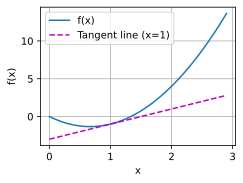

In [105]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

微分的定义

梯度

链式法则求解多元函数微分


### 自动求导
*本节小结：这一节再多看几遍*

计算图：将代码分解成操作子；将计算表示为一个无环图

自动求导的两种模式：正向积累和反向积累

链式法则 $$\frac{dy}{dx} = \frac{dy}{du} \frac{du}{dx}.$$

下面对函数$y=2\mathbf{x}^{\top}\mathbf{x}$关于列向量$\mathbf{x}$求导：

In [106]:
import torch

x = torch.arange(4.0,requires_grad=True) # 在x里面存储梯度
x.grad  # 默认为None
y = 2 * torch.dot(x, x)
y.backward() # 反向传播
x.grad 
# 在默认情况下，PyTorch会累积梯度，我们需要清除之前的值 x.grad.zero_()
# 在绝大多数情况下，很少对向量进行求导，都是对标量。y.sum().backward()
# u = y.detach() 把u看作是一个关于y的常量
# 还可以利用Python控制流（例如，条件、循环或任意函数调用），来计算导数

tensor([ 0.,  4.,  8., 12.])

## 线性神经网络-linearnetworks
### Softmax回归
*本节小结：Softmax回归是一个多分类模型，使用交叉熵来衡量真实概率和预测概率的区别。*

### 图像分类数据集

In [107]:
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display() # 封装函数，图像显示

In [108]:
trans = transforms.ToTensor() # 将图像数据从PIL类型变换成32位浮点数格式
mnist_train = torchvision.datasets.FashionMNIST(  
    root="../data", train=True, transform=trans, download=True)  # 必须科学上网才能下载
mnist_test = torchvision.datasets.FashionMNIST(
    root="../data", train=False, transform=trans, download=True)

In [109]:
len(mnist_train), len(mnist_test) # 查看数量
mnist_train[0][0].shape # 查看输入图像的高度和宽度

torch.Size([1, 28, 28])

In [110]:
def get_fashion_mnist_labels(labels):  #@save
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

In [111]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  #@save 可视化样本
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            ax.imshow(img.numpy()) # 图片张量
        else:
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

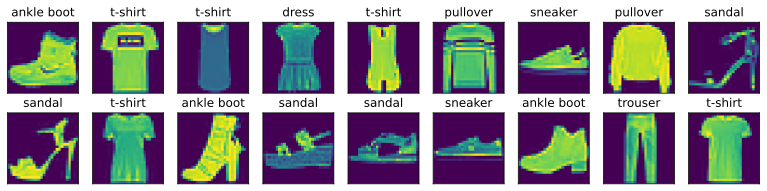

In [112]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
show_images(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y));

In [113]:
batch_size = 256
def get_dataloader_workers():  #@save
    return 4

train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True,
                             num_workers=get_dataloader_workers())

timer = d2l.Timer()
for X, y in train_iter:
    continue
f'{timer.stop():.2f} sec'  # 读取训练数据所需的时间

'6.09 sec'

In [114]:
def load_data_fashion_mnist(batch_size, resize=None):  #@save
    # 用于获取和读取Fashion-MNIST数据集，返回训练集和验证集的数据迭代器，参数resize用来将图像大小调整为另一种形状
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root="../data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root="../data", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=get_dataloader_workers()))

In [115]:
train_iter, test_iter = load_data_fashion_mnist(32, resize=64)  # 调用上面定义的函数
for X, y in train_iter:
    print(X.shape, X.dtype, y.shape, y.dtype)
    break

torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64


### Softmax回归代码实现

In [116]:
import torch
from IPython import display
from d2l import torch as d2l

batch_size = 256 # 批量
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [117]:
num_inputs = 784 # 28*28的图像
num_outputs = 10 # 10个类别

W = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True) # 权重
b = torch.zeros(num_outputs, requires_grad=True) # 偏置

Softmax表达式：
$$
\mathrm{softmax}(\mathbf{X})_{ij} = \frac{\exp(\mathbf{X}_{ij})}{\sum_k \exp(\mathbf{X}_{ik})}.
$$

In [118]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdim=True)
    return X_exp / partition  # 广播机制

In [119]:
X = torch.normal(0, 1, (2, 5)) # 标准正态分布，均值为0，标准差为1，生成一个2*5的矩阵
X_prob = softmax(X) 
X_prob, X_prob.sum(1) # 按列相加

(tensor([[0.0497, 0.6599, 0.0534, 0.1666, 0.0704],
         [0.1347, 0.2353, 0.5766, 0.0369, 0.0164]]),
 tensor([1.0000, 1.0000]))

In [120]:
def net(X):
    return softmax(torch.matmul(X.reshape((-1, W.shape[0])), W) + b) # 输入通过网络映射到输出

In [121]:
def cross_entropy(y_hat, y):
    return - torch.log(y_hat[range(len(y_hat)), y]) # 交叉熵损失函数

In [122]:
def accuracy(y_hat, y):  #@save 分类精度
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum())

In [123]:
def evaluate_accuracy(net, data_iter):  #@save 计算在指定数据集上模型的精度
    if isinstance(net, torch.nn.Module):
        net.eval()  # 将模型设置为评估模式
    metric = Accumulator(2)  # 正确预测数、预测总数
    with torch.no_grad():
        for X, y in data_iter:
            metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

In [124]:
class Accumulator:  #@save 用于对多个变量进行累加
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [125]:
def train_epoch_ch3(net, train_iter, loss, updater):  #@save 训练模型
    # 将模型设置为训练模式
    if isinstance(net, torch.nn.Module):
        net.train()
    # 训练损失总和、训练准确度总和、样本数
    metric = Accumulator(3)
    for X, y in train_iter:
        # 计算梯度并更新参数
        y_hat = net(X)
        l = loss(y_hat, y)
        if isinstance(updater, torch.optim.Optimizer):
            # 使用PyTorch内置的优化器和损失函数
            updater.zero_grad()
            l.mean().backward()
            updater.step()
        else:
            # 使用定制的优化器和损失函数
            l.sum().backward()
            updater(X.shape[0])
        metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
    # 返回训练损失和训练精度
    return metric[0] / metric[2], metric[1] / metric[2]

In [126]:
class Animator:  #@save 在动画中绘制数据
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # 增量地绘制多条线
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # 使用lambda函数捕获参数
        self.config_axes = lambda: d2l.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # 向图表中添加多个数据点
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

In [127]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):  #@save
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

In [128]:
lr = 0.1 # 学习率

def updater(batch_size):
    return d2l.sgd([W, b], lr, batch_size)

In [129]:
num_epochs = 5 # 迭代周期
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)

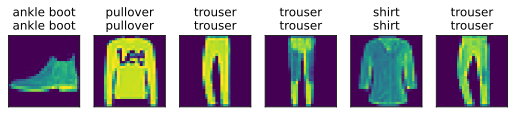

In [130]:
def predict_ch3(net, test_iter, n=6):  #@save 预测
    for X, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true +'\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(
        X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])

predict_ch3(net, test_iter)

### Softmax回归简介实现
使用Fashion-MNIST数据集，并保持批量大小为256

In [131]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
net = nn.Sequential(nn.Flatten(), nn.Linear(784, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);
loss = nn.CrossEntropyLoss(reduction='none') 
trainer = torch.optim.SGD(net.parameters(), lr=0.1) # 使用学习率为0.1的小批量随机梯度下降作为优化算法
num_epochs = 10
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

## 多层感知机
感知机是一个二分类模型，只适用于P问题，不能拟合XOR函数，求解算法等价于使用批量大小为1的梯度下降。

多层感知机使用隐藏层和激活函数来得到非线性模型，常用激活函数是Sigmoid、Tanh、ReLU

ReLU函数：$$\operatorname{ReLU}(x) = \max(x, 0).$$

Sigmoid函数(将输入投影到(0,1))：$$\operatorname{sigmoid}(x) = \frac{1}{1 + \exp(-x)}.$$

Tanh函数：$$\operatorname{tanh}(x) = \frac{1 - \exp(-2x)}{1 + \exp(-2x)}.$$

超参数为隐藏层数、每层隐藏层大小


### 多层感知机简洁实现

In [132]:
import torch
from torch import nn
from d2l import torch as d2l

batch_size, lr, num_epochs = 256, 0.1, 10
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, 256),
                    nn.ReLU(), # 激活函数
                    nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)
        
net.apply(init_weights);
loss = nn.CrossEntropyLoss(reduction='none') # 交叉损失熵，损失函数
trainer = torch.optim.SGD(net.parameters(), lr=lr) # 优化器

d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer) #训练

### 模型选择、过拟合、欠拟合
训练数据集用于训练模型参数，验证数据集用于选择模型超参数(评估模型好坏)，测试数据集是只用一次的数据集。

一个数据集可分为如下结构：

((训练+验证)，测试)    通常在代码中验证数据集取名为test。   

若一个数据集不大，通常使用k-折交叉验证方法。

模型容量需要匹配数据复杂度，否则会导致欠拟合和过拟合。用泛化误差和训练误差之间的差异来判断模型过拟合和欠拟合的情况。

如何估计模型容量：
- 参数的个数
- 参数值的选择范围

### 权重衰退
通过限制参数值的选择范围来控制模型容量。

权重衰退通过L2正则项使得模型参数不会过大，从而控制模型复杂度。正则项权重是控制模型复杂度的超参数。

$$L(\mathbf{w}, b) + \frac{\lambda}{2} \|\mathbf{w}\|^2,$$

### 丢弃法

将一些输出项随机置0来控制模型复杂度，常作用在多层感知机的隐藏层输出上，丢弃概率是控制模型复杂度的超参数。
$$
\begin{aligned}
h' =
\begin{cases}
    0 & \text{ 概率为 } p \\
    \frac{h}{1-p} & \text{ 其他情况}
\end{cases}
\end{aligned}
$$

### 数值稳定性、模型初始化和激活函数
当数值过大或者过小时，都会导致数值问题。(梯度爆炸、梯度消失)

常发生于深度模型中，因为会对$n$个数累乘。

合理的权重初始值和激活函数的选取可以提升数值稳定性。



-----
截止至2024/6/3

-----
ing...